In [1]:
#nidanur gunay 24231
import pandas as pd #import to pandas library for data manipulation and analysis
import numpy as np #import numy to mathematical and logical operations on arrays can be performed.
import matplotlib.pyplot as plt #import matlolib to sed to create 2D graphs and plots by using python scripts.
from scipy import stats# import the stats to allow to users to explore data, estimate statistical models, and perform statistical tests
from datetime import datetime # provides a number of function to deal with dates, times and time intervals.
import seaborn as sns  # a visualization library based on matplotlib


import warnings#sed in the places where the condition or usage doesn't raise any exception or terminating the program.
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [2]:
dt=pd.read_csv("taxi-trips (2).csv")# i read my cvs file
dt.head()#print the first 5 of it

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [3]:
n_rows, n_columns = dt.shape#print to number of columns and rows
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 118185, number of columns: 11


In [4]:
dt.dtypes# it will show us the type of the data

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
dt.describe()# we are identiying the data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [4]:
import reverse_geocoder as rg#import and download geocode to get the exact location by the given coordinates
pickup_longitudes = dt['pickup_longitude']
pickup_latitudes = dt['pickup_latitude']

List_pickup = list(zip(pickup_latitudes,pickup_longitudes))#i zipped the list
results_pickup = rg.search(List_pickup)


Loading formatted geocoded file...


In [5]:
dropoff_longitudes = dt['dropoff_longitude']#same thing for the dropp off points
dropoff_latitudes = dt['dropoff_latitude']

List_dropoff = list(zip(dropoff_latitudes,dropoff_longitudes))
results_dropoff = rg.search(List_dropoff)


In [6]:
resultsArrayPickup = []#i created an array to store the pickup district
for i in results_pickup:
    resultsArrayPickup.append(i.get('name'))# i looped the array for the given coordinats

dt['pickup_district'] = resultsArrayPickup#now my array is stored by the location of given pickup cooordinates
dt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City


In [7]:
resultsArrayDropoff = []#samething for the dropp off points
for i in results_dropoff:
    resultsArrayDropoff.append(i.get('name'))

dt['dropoff_district'] = resultsArrayDropoff
dt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [8]:
top5districts = dt.groupby(by='pickup_district')['pickup_district'].count().sort_values(ascending=False)[:5]
print(top5districts)#i groped the top5 pickup visited district

pickup_district
Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [9]:
top5districts_2 = dt.groupby(by='dropoff_district')['dropoff_district'].count().sort_values(ascending=False)[:5]
print(top5districts_2)#i grouped the top 5 dropoff district

dropoff_district
Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


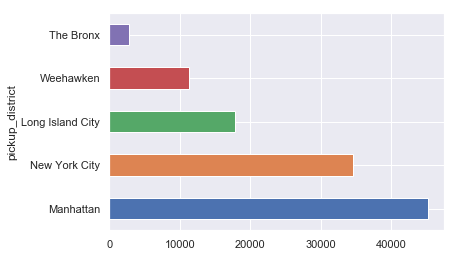

In [10]:
top5districts.plot(kind="barh")# the graph will show the top 5 pickup district 

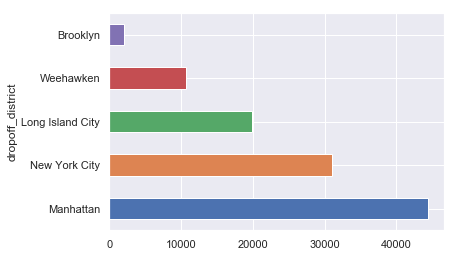

In [11]:
top5districts_2.plot(kind="barh")#the graph will show the top 5 dropoff district 

In [12]:
from geopy import distance# o calculate the distance i ip+mporeted the distance from geopy library
list1=[]#i built an array
for i in range (len(resultsArrayPickup)):
    dist=(distance.great_circle(List_pickup[i],List_dropoff[i]).miles)#dists are the distance between the pickup and dropoff 
    list1.append(dist)# i stored the distance in list1 array in each row


In [13]:
dt["distance"]=list1
dt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023


In [14]:
def timeofday(df):# i grouped the time of the day by the given names
 if  7<=df.hour and df.hour<9:
    return "rush_hour_morning"
 elif 9<= df.hour and df.hour <16:
    return "afternoon"
 elif 16 <=df.hour and df.hour <18:
    return "rush_hour_evening"
 elif 18<=df.hour and df.hour <23:
    return "evening"
 elif 23 <= df.hour or df.hour <7:
    return "late_night"

In [15]:
dt["pickup_daytime"]=pd.to_datetime(dt["pickup_datetime"])#i used the datetime library
dt["time_of_day"]=dt["pickup_daytime"].apply(timeofday)#i named the timeofday for each line 
dt["time_of_day"]

dt.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,pickup_daytime,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,2016-03-14 17:24:55,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,2016-03-10 21:45:01,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,2016-03-11 07:11:23,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,2016-03-14 14:05:39,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,2016-03-14 15:04:38,afternoon


In [24]:
def time(row):
    pick_time = row["pickup_datetime"]
    hms = pick_time[-8:]
    
    x = int(hms[:2])
    
   
           
    if x >= 0 and x<7:
        return "late_night"
    elif x >= 7 and x < 9:
        return "rush_hour_morning"
    elif x >= 9 and x < 16:
        return "afternoon"
    elif x >= 16 and x < 18:
        return "rush_hour_evening"
    elif x >= 18 and x < 23:
        return "evening"
    elif x >= 23 and x < 24:
        return "late_night"


dt['time_of_day'] = dt.apply(time, axis=1)  

dt.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,pickup_daytime,time_of_day,DayOfWeek
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,0.931139,2016-03-14 17:24:55,rush_hour_evening,weekday
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,3.182147,2016-03-10 21:45:01,evening,weekday
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,0.927234,2016-03-11 07:11:23,rush_hour_morning,weekday
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.225473,2016-03-14 14:05:39,afternoon,weekday
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,1.564023,2016-03-14 15:04:38,afternoon,weekday


In [ ]:
sum = 0.0# i intialized the total sum as 0
rushm = 0.0 #then i initialized the time of day as 0
aftnoon = 0.0
rhevening = 0.0
even = 0.0
lnight = 0.0
for _, row in dt.iterrows():
    x = float(row['distance'])
    name = row["time_of_day"]
    sum += x #i increased and calculated the sum in each row to calculate the percentage
    if name == "rush_hour_morning":
        rushm += x#i calculated the number of rush hour morning
    elif name == "afternoon":
        aftnoon += x#i calculated the number of afternoon
    elif name == "rush_hour_evening":
        rhevening += x#i calculated the number of rush hour evening
    elif name == "evening":
        even += x#i calculated the number of evening
    elif name == "late_night":
        lnight += x#i calculated the number of late night

data = {'rush_hour_morning': rushm / sum, 'afternoon': aftnoon / sum, 'rush_hour_evening': rhevening / sum, 'evening': even / sum, 'late_night': lnight / sum}
names = list(data.keys())
values = list(data.values())#i calculated the rate of the given time of day


plt.bar(names, values)
plt.ylabel("Avg. Distance (miles)") #i labeled the y axes as Avg. distance
plt.xlabel("Time of day") #i labeled the x axis as Time of day
plt.title("Average Distance Variation as Time of the Day") # i named my graph as given string
plt.show()


In [ ]:
sum = 0.0 #i did the samething for the trip duration
rushm = 0.0
aftnoon = 0.0
rhevening = 0.0
even = 0.0
lnight = 0.0
for _, row in dt.iterrows():
    x = int(row['trip_duration'])
    name = row["time_of_day"]
    sum += x
    if name == "rush_hour_morning":
        rushm += x
    elif name == "afternoon":
        aftnoon += x
    elif name == "rush_hour_evening":
        rhevening += x
    elif name == "evening":
        even += x
    elif name == "late_night":
        lnight += x

data = {'rush_hour_morning': rushm, 'afternoon': aftnoon, 'rush_hour_evening': rhevening, 'evening': even, 'late_night': lnight}
name = list(data.keys())
value = list(data.values())

plt.bar(name, value)

plt.ylabel("Total Trip Duration (seconds)")
plt.xlabel("Time of day")
plt.title("Trip Duration varation as Time of the day")
plt.show()

In [ ]:
test1 = "distance"

one_passenger = dt[dt["passenger_count"] == 1][test1] 
more_passenger = dt[dt["passenger_count"] > 1 ][test1]    
mean_of_one_passenger = one_passenger.mean()
mean_of_morepassenger = more_passenger.mean()

objects = ('one_pas', 'more_than_one++')
y_pos = np.arange(len(objects))
perf = [mean_of_one_passenger,mean_of_morepassenger]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Passenger effect on Distance')

plt.show()

In [ ]:
stats.ttest_ind(one_passenger, more_passenger, equal_var=False) #i applied t test
#hypothesis is "group size of passenger affects the distance"
#according to null hypothesis test, p value is less than 0.05 so null hypotesis is wrong

In [ ]:
d = pd.to_datetime(dt["pickup_datetime"], infer_datetime_format=True)
theDay=d.dt.day_name()
arr = []#i created an array to store the data day if they are weekday or weekend
for i in range (len(dt['id'])):#i stored the type of days for each row
    if theDay[i] == "Sunday":
        Week = "weekend"
    elif theDay[i] == "Saturday":
        Week = "weekend"
    else:
        Week = "weekday"
    arr.append(Week)
    
dt['DayOfWeek'] = arr
print(dt['DayOfWeek'])

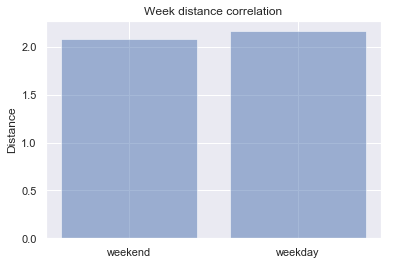

In [22]:
test_type2 = "distance"

weekend_var = dt[dt["DayOfWeek"] == "weekend"][test_type2] 
weekeday_var = dt[dt["DayOfWeek"] == "weekday" ][test_type2]    
weekend = one_passenger.mean()
weekday = more_passenger.mean()

objects = ('weekend', 'weekday')
y_pos = np.arange(len(objects))
perf = [weekend,weekday]
 
plt.bar(y_pos, perf, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Distance')
plt.title('Week distance correlation')

plt.show()

In [23]:
#hypothesis is "the weektime affect the distance"
#according to null hypothesis test, p value is less than 0.05 so null hypotesis is wrong
stats.ttest_ind(weekend_var, weekeday_var, equal_var=False)

Ttest_indResult(statistic=5.61921641810278, pvalue=1.9260544245367343e-08)